In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
from IPython import display
display.clear_output()
!yolo mode=checks

from ultralytics import YOLO 
from IPython.display import display, Image


WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Setup complete ✅ (64 CPUs, 251.7 GB RAM, 472.9/1758.9 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="McoQ2UFDxFzalwE5z5dN")
project = rf.workspace("taco-t7kkz").project("taco-dataset-ql1ng")
dataset = project.version(15).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.90, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to TACO-dataset-15 in yolov8:: 100%|██████████| 3818/3818 [00:00<00:00, 9189.97it/s]


In [3]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=416

Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/hpate061/CitrusHack/TACO-dataset-15/data.yaml, epochs=100, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=F

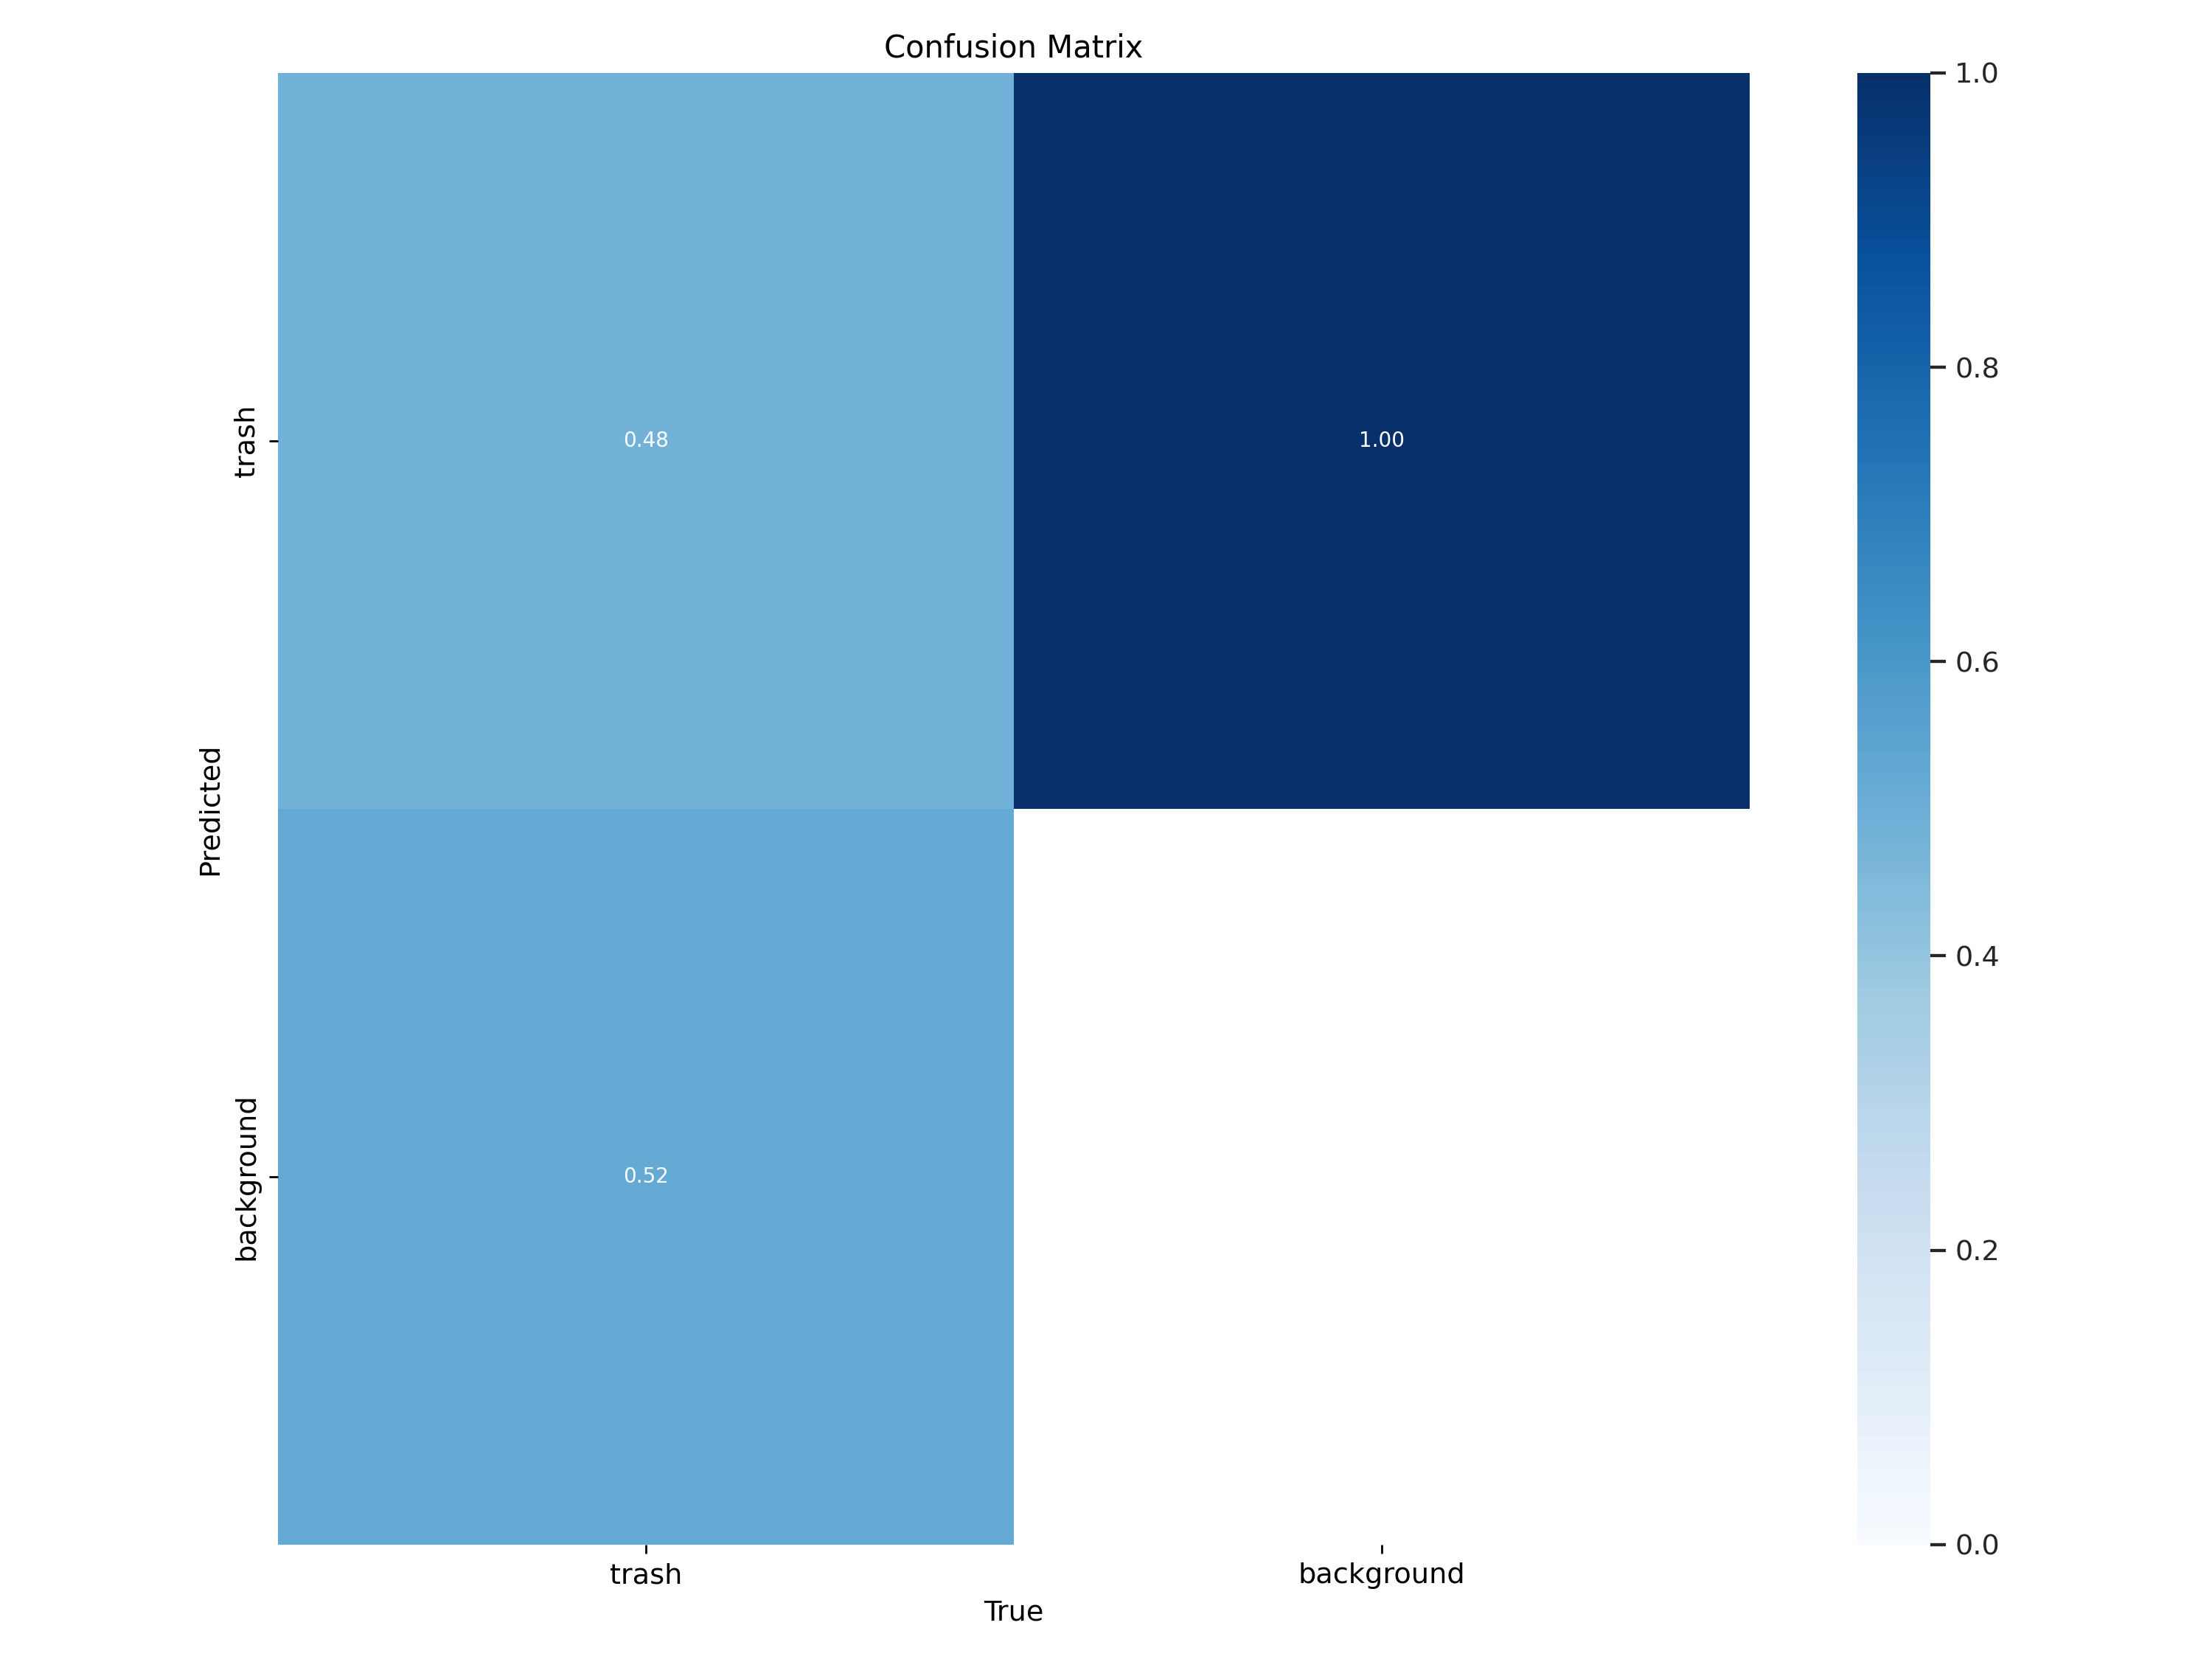

In [10]:
Image("/home/hpate061/CitrusHack/runs/detect/train/confusion_matrix.png")

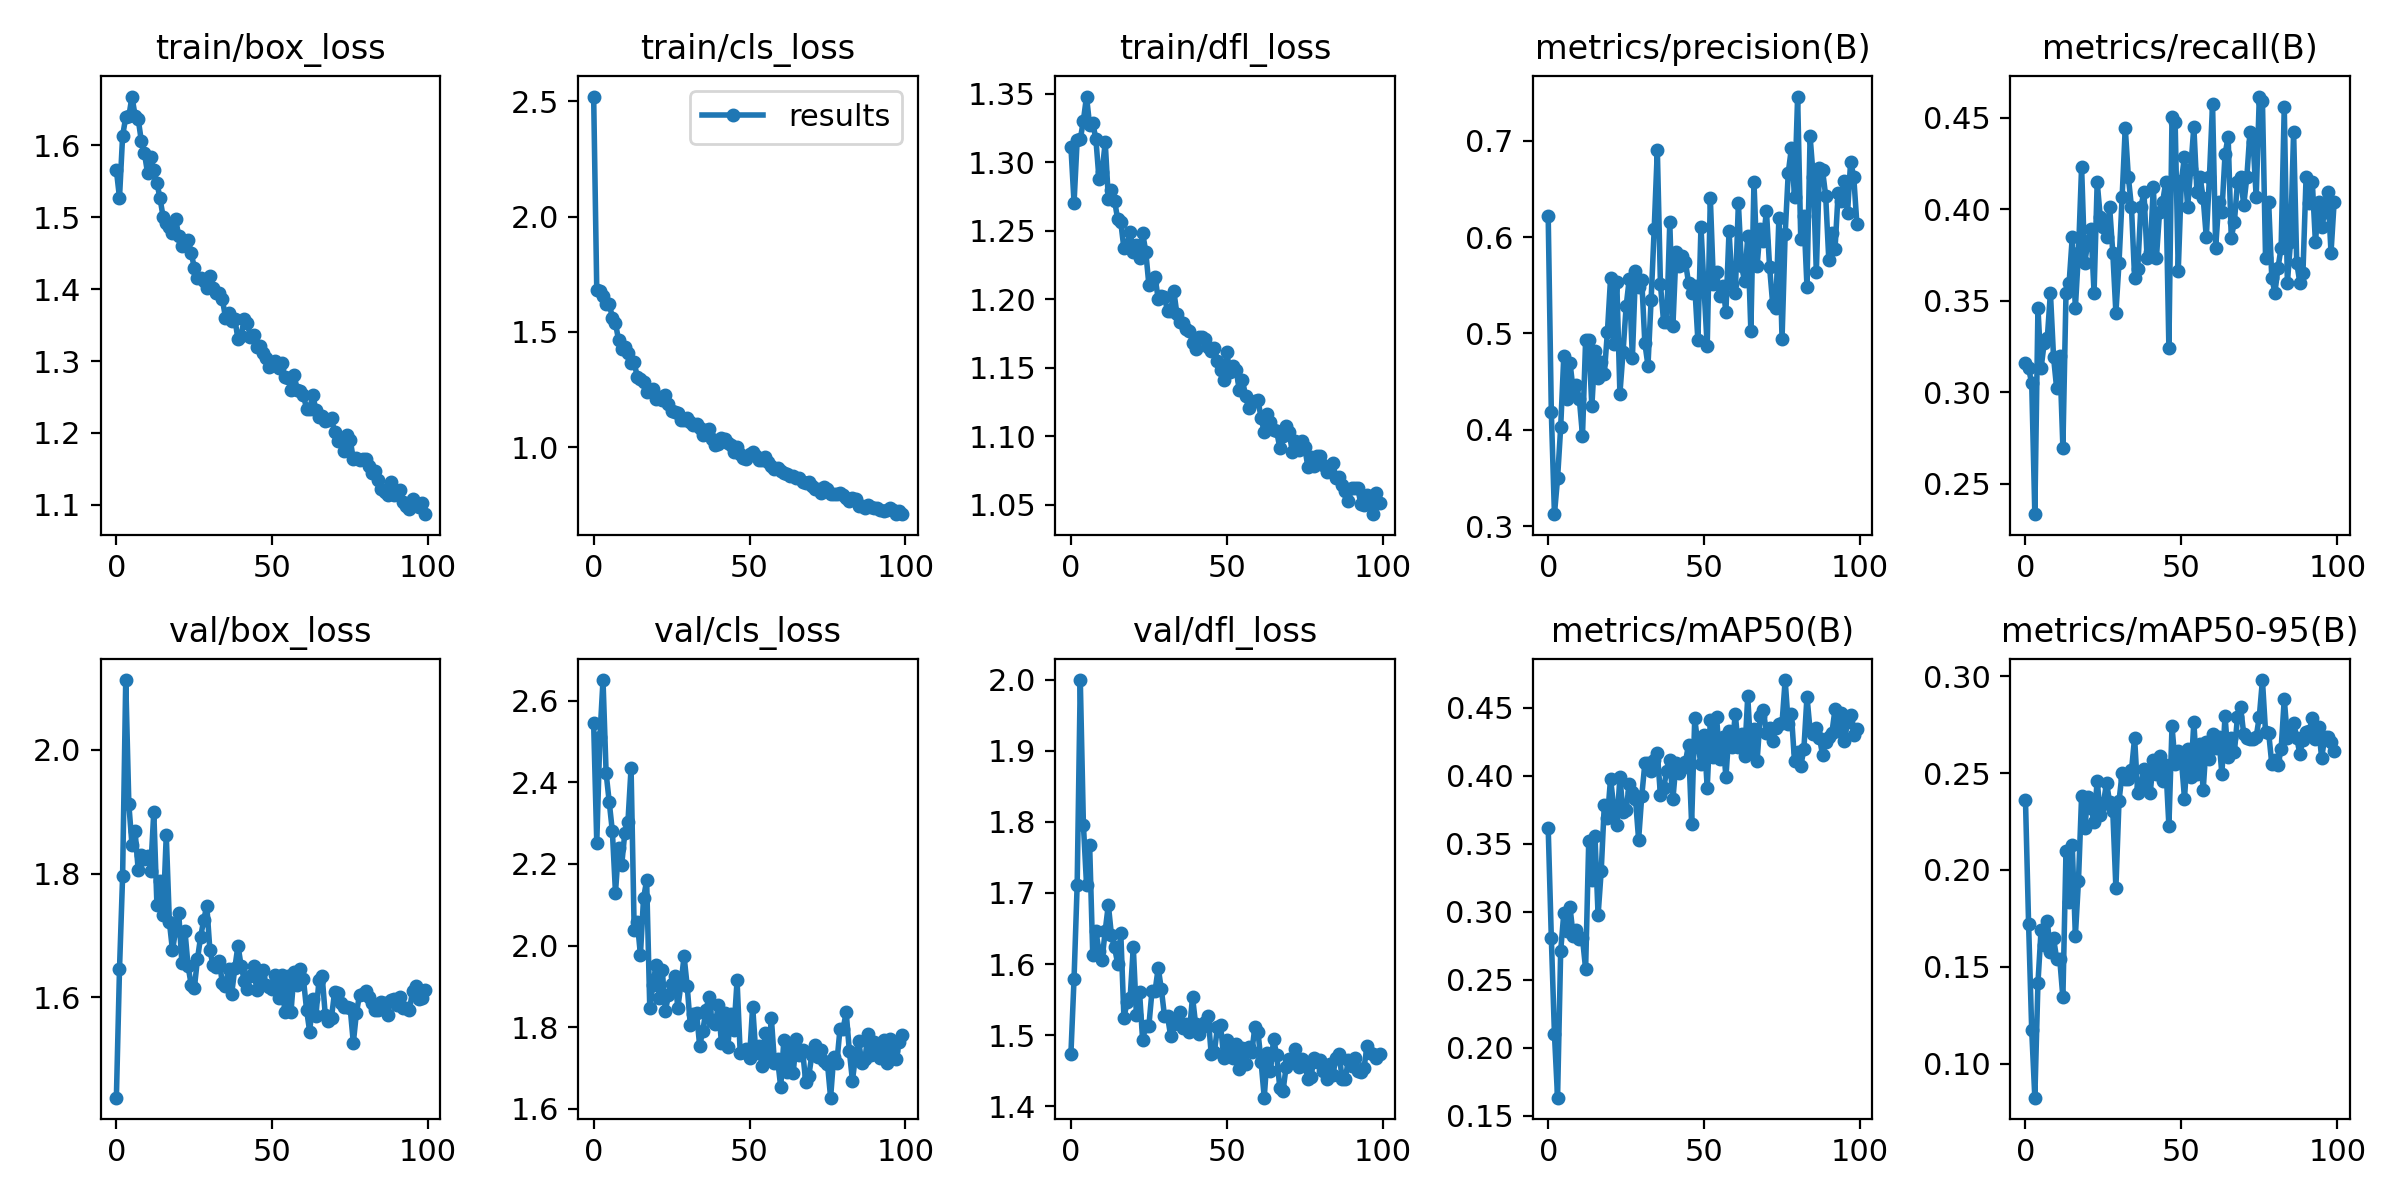

In [11]:
Image("/home/hpate061/CitrusHack/runs/detect/train/results.png")

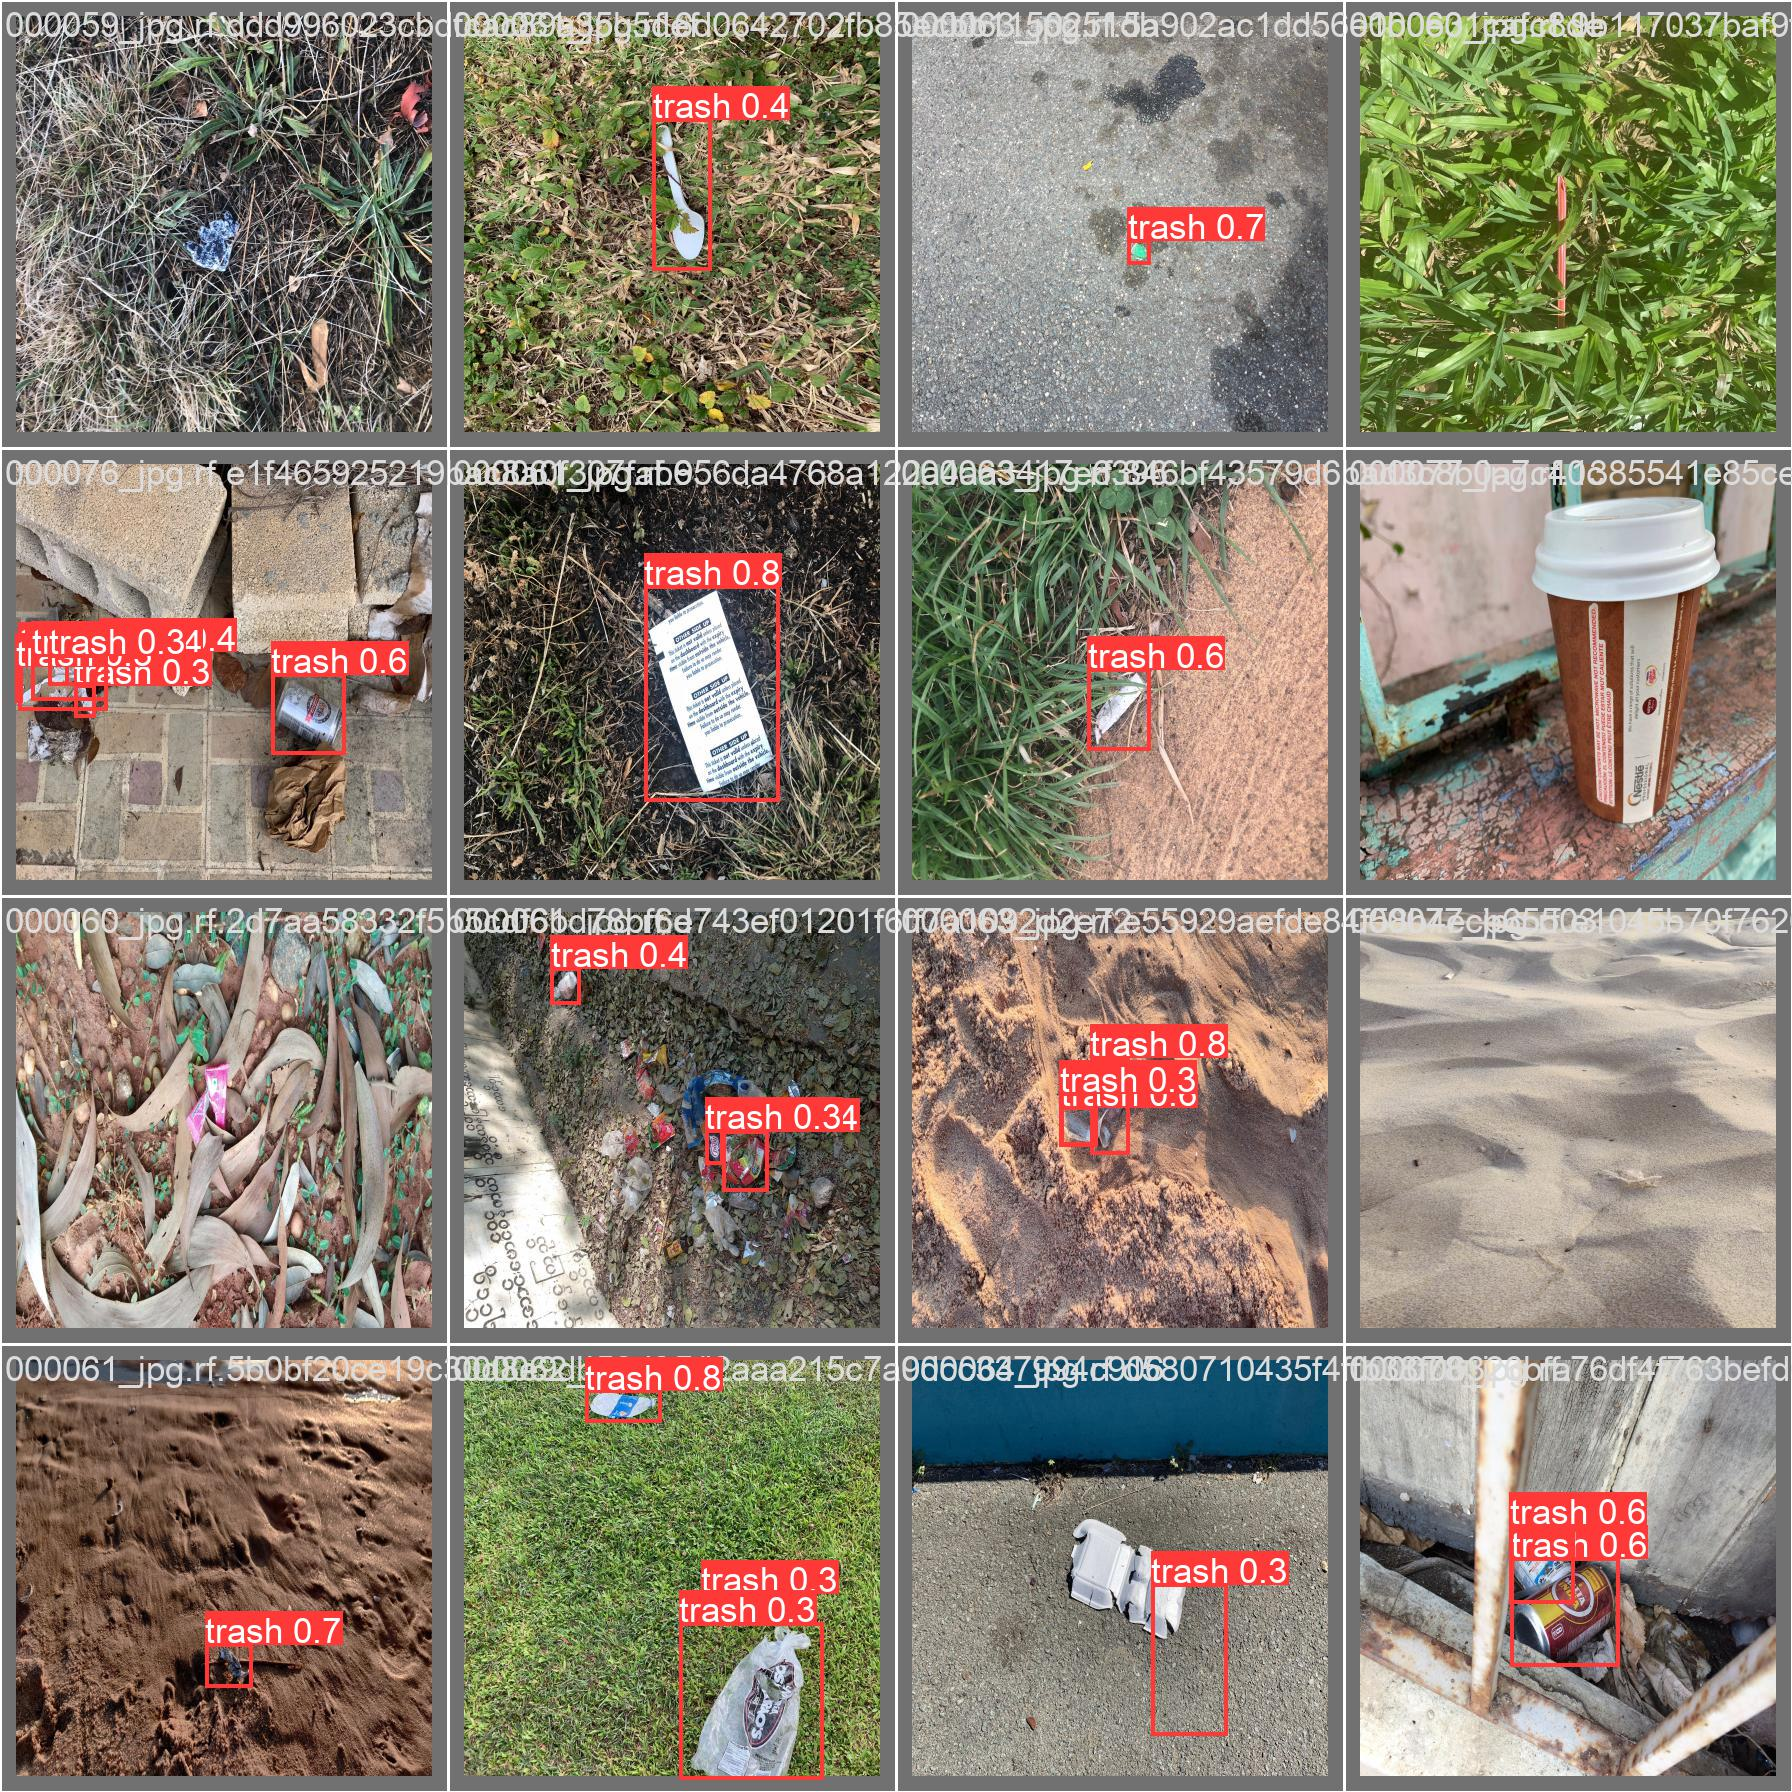

In [6]:
Image("/home/hpate061/CitrusHack/runs/detect/train/val_batch1_pred.jpg")

In [12]:
!yolo task=detect mode=val model=/home/hpate061/CitrusHack/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/hpate061/CitrusHack/TACO-dataset-15/valid/labels.cache... 18
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        189        364       0.61      0.464      0.471      0.299
Speed: 0.3ms preprocess, 1.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val2


In [13]:
!yolo task=detect mode=predict model=/home/hpate061/CitrusHack/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.90 🚀 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/189 /home/hpate061/CitrusHack/TACO-dataset-15/test/images/000000_JPG.rf.c6ff4011e42f59dd99c504518a544a5a.jpg: 416x416 1 trash, 4.8ms
image 2/189 /home/hpate061/CitrusHack/TACO-dataset-15/test/images/000002_JPG.rf.84366049ba7b106a13a03d663f2d12f0.jpg: 416x416 3 trashs, 5.0ms
image 3/189 /home/hpate061/CitrusHack/TACO-dataset-15/test/images/000003_JPG.rf.310a8acc92f8a48ac74e60b3d63f5957.jpg: 416x416 1 trash, 4.7ms
image 4/189 /home/hpate061/CitrusHack/TACO-dataset-15/test/images/000003_JPG.rf.8ca78b9b0523bb56bfe9a74769eb32c6.jpg: 416x416 2 trashs, 4.7ms
image 5/189 /home/hpate061/CitrusHack/TACO-dataset-15/test/images/000004_JPG.rf.f01f4da35b31ae43952331bc7e46c89d.jpg: 416x416 (no detections), 4.7ms
image 6/189 /home/hpate061/CitrusHack/TACO-dataset-15/test/images/000005_JPG.rf.6a3b4a7db75a6a2af4f66cf7aacca97b.jpg:

In [9]:
project.version(dataset.version).deploy(model_type='yolov8', model_path="/home/hpate061/CitrusHack/runs/detect/train")

Dependency ultralytics<=8.0.20 is required but found version=8.0.90, to fix: `pip install ultralytics<=8.0.20`
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/taco-t7kkz/taco-dataset-ql1ng/15/uploadModel?api_key=McoQ2UFDxFzalwE5z5dN&modelType=yolov8&nocache=true
